### Código realizado por:
Camilo José Sierra Otero\

In [ ]:
# Se proceden a importar las librerias
import matplotlib.pyplot as plt
import numpy as np
! pip install -q rebound
import rebound as rb

## Punto número 1
Análisis de configuraciones similares al Sistema Solar.

El MEGNO del sistema es: 2.00


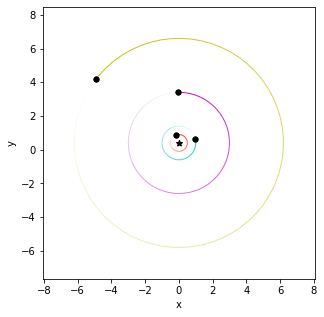

In [ ]:
# Configuración I.

# Se crea la primera simulación y se le asignan las unidades respectivas
sim = rb.Simulation()
sim.units = ('au','mearth','yr') # Unidades astronómicas, masas terrestres y años.

# Configuración de un sistema solar con planetas distintos.

sim.add(m=333000) # Sol
sim.add(m=0.8,hash='Zeus', a=0.5)
sim.add(m=1,hash='Cronos', a=1)
sim.add(m=1.2,hash='Janus', a=3)
sim.add(m=100,hash='Julius', a=6.2)

# Cálculo del MEGNO.
sim.init_megno()
sim.integrate(500)
megno = sim.calculate_megno()

print(f'El MEGNO del sistema es: {megno:.2f}')

rb.OrbitPlot(sim, color = True)

El sistema presentado anteriormente exhibe un comportamiento estable.

El MEGNO del sistema es: 2.02


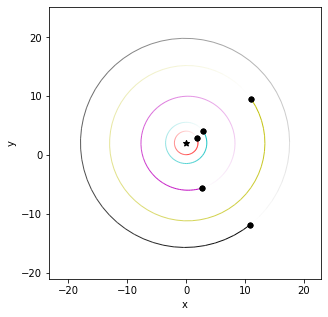

In [ ]:
# Configuración II.

# Crear otra simulacion

sim = rb.Simulation()
sim.units = ('au', 'mearth', 'yr')


sim.add(m=111000) # Sol
sim.add(m=1,hash='Kaguya', a=2)
sim.add(m=0.8,hash='Susanoo', a=3.5)
sim.add(m=5,hash='Amaterasu', a=8)
sim.add(m=100,hash='Himiko', a=14)
sim.add(m=400,hash='Kinkaku', a=17.5)

# Cálculo del MEGNO.
sim.init_megno()
sim.integrate(500)
megno = sim.calculate_megno()

print(f'El MEGNO del sistema es: {megno:.2f}')

rb.OrbitPlot(sim, color = True)

El sistema presentado anteriormente exhibe un comportamiento inestable.

## Punto número 2
Varianza de órbita de un planeta cuyo radio orbital oscila entre 5 a 10 au.

In [ ]:
# Se crea un ciclo for para analizar el comportamiento del planeta rogue entre un radio orbital de 5 a 10 au.

step = 0.5 # Se define el tamaño de paso del semieje mayor de la órbita.
orbitas = np.arange(5,10.1,step) # Orbitas es el arreglo que incluye los semiejes mayores entre 5 au y 10 ay con un step predefinido.
lista_megno = np.zeros(len(orbitas))

for i in range(len(orbitas)):
  sim2 = rb.Simulation() # Se crea una nueva simulación
  sim2.units = ('au','mearth','yr')
  sim2.add(m=333000, hash = 'Sol')
  sim2.add(m=317.923, hash='Jupiter', a=5.204)
  sim2.add(m=317.923, hash='Saturno', a=9.572)
  sim2.add(m=317.8, hash = i , a = orbitas[i])
  sim2.init_megno()
  sim2.integrate(250)
  lista_megno[i] = sim2.calculate_megno()
  print(lista_megno[i])

20.46412121024282
24.794574754942726
6.076885850403006
2.2573505969304386
2.099357879944981
2.066187553972169
1.923077761659304
2.4646853275703315
31.11027812036857


/usr/local/lib/python3.9/dist-packages/rebound/simulation.py:1032: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


307.1207442801692
28.122378816800833


In [ ]:
# Función para imprimir si el sistema es estable o inestable según el valor del MEGNO.

for i in range(len(lista_megno)):
  if lista_megno[i] <= 2:
    print(f'El valor del sistema {i+1} es estable debido al valor del MEGNO de {lista_megno[i]:.2f}')
  if lista_megno[i] >= 2:
    print(f'El valor del sistema {i+1} es inestable debido al valor del MEGNO de {lista_megno[i]:.2f}')

El valor del sistema 1 es inestable debido al valor del MEGNO de 20.46
El valor del sistema 2 es inestable debido al valor del MEGNO de 24.79
El valor del sistema 3 es inestable debido al valor del MEGNO de 6.08
El valor del sistema 4 es inestable debido al valor del MEGNO de 2.26
El valor del sistema 5 es inestable debido al valor del MEGNO de 2.10
El valor del sistema 6 es inestable debido al valor del MEGNO de 2.07
El valor del sistema 7 es estable debido al valor del MEGNO de 1.92
El valor del sistema 8 es inestable debido al valor del MEGNO de 2.46
El valor del sistema 9 es inestable debido al valor del MEGNO de 31.11
El valor del sistema 10 es inestable debido al valor del MEGNO de 307.12
El valor del sistema 11 es inestable debido al valor del MEGNO de 28.12


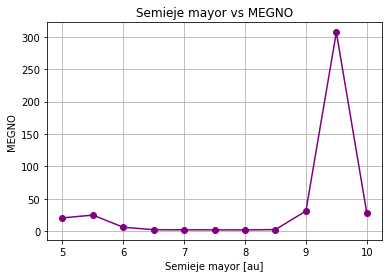

In [ ]:
# Grafico del semieje mayor (a) vs MEGNO

fig,ax=plt.subplots()

ax.plot(orbitas,lista_megno, marker='o', color ='purple')
ax.set_xlabel("Semieje mayor [au]")
ax.set_ylabel("MEGNO")
ax.set_title("Semieje mayor vs MEGNO")
ax.grid()

## Punto número 3
¿Cúantos planetas caben entre Júpiter y Saturno antes de que la estabilidad del Sistema Solar colapse?

In [ ]:
N = 2  # Número de planetas
megno = 0 # Variable MEGNO incializada en cero.
while megno <= 2: # La simulación continuará hasta que el MEGNO sea mayor o igual que 2.

  sim3 = rb.Simulation()
  sim3.units = ('au', 'mearth', 'yr')
  sim3.add(m=333000) # Sol

  for i in np.arange(5,30,N):
    sim3.add(m=318, a=i)

  sim3.init_megno() # Se llama la función para calcular el MEGNO.
  sim3.integrate(150)
  megno = sim3.calculate_megno()
  N += 1   # Se añade 1 planeta más para nuevamente calcular el MEGNO.

print(f"Existen {N} planetas con órbitas igualmente espaciadas que podrían caber en el sistema solar, y cuyo MEGNO sería {megno:.2f}")

Existen 3 planetas con órbitas igualmente espaciadas que podrían caber en el sistema solar, y cuyo MEGNO sería 25.12


## Punto número 4
Variación de la excentricidad de la órbita de Júpiter y su incidencia en la estabilidad del Sistema Solar.

In [ ]:
step = 10 # Tamaño de paso
megno_e = np.zeros((step))
ex = np.linspace(0,0.9,step)

for i in range(len(ex)):

  # Se crea nuevamente otra simulación
  sim4 = rb.Simulation()
  sim4.units = ('au', 'mearth', 'yr')

  # Añadimos a la simulacion las partículas necesarias.
  sim4.add(m=333000) # Sol
  sim4.add(m=318,hash='Jupiter', a=5.2, e= ex[i]) #e: Excentricidad
  sim4.add(m=1,hash='Tierra', a=1)
  sim4.add(m=0.108,hash='Marte', a=1.52)
  sim4.init_megno()
  sim4.integrate(550)
  megno_e[i] = sim4.calculate_megno()


In [ ]:
megno_e

array([ 2.00071235,  2.00350959,  2.00640072,  2.00530809,  2.01023524,
        2.01031875,  3.38071159, 10.70748334, 22.26284433, 19.90140352])

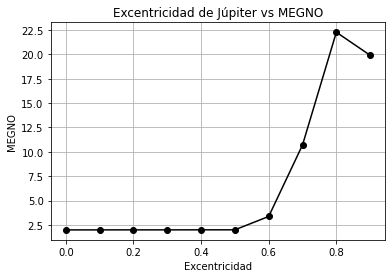

In [ ]:
# Grafico de excentricidad (e) de Jupiter vs MEGNO.

fig,ax=plt.subplots()

ax.plot(ex, megno_e, marker='o', color ='black')
ax.set_xlabel("Excentricidad")
ax.set_ylabel("MEGNO")
ax.set_title("Excentricidad de Júpiter vs MEGNO")
plt.grid()